In [2]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats

import sys

In [3]:
# Set the maximum width of the display
pd.set_option('display.width', 1000)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 30)

pd.set_option('display.precision', 2)

In [4]:
# fetch dataset
data = fetch_ucirepo(id=374)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data=data.data.features)

re_express = r'(\d{4})-(\d{2})-(\d{2})(\d{2}):(\d{2}):(\d{2})'

# Replace using the pattern
df['date'] = df['date'].str.replace(re_express, r'\1-\2-\3 \4:\5:\6', regex=True)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S", errors='raise')

# df['date'] = pd.date_range(start='2016-01-11 17:00:00', end='2016-05-27 18:00:00', freq='10min')

# If the data has target labels, you can also add them to the DataFrame
df['target'] = data.data.targets

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Optionally, sort the DataFrame by the new datetime index
df.sort_index(inplace=True)

# since we sort the dataframe by the new datetime index
df = df.reset_index()

# Display the first few rows of the DataFrame
df.head()

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,target
0,2016-01-11 17:00:00,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.2,48.90,17.03,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28,60
1,2016-01-11 17:10:00,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.2,48.86,17.07,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61,60
2,2016-01-11 17:20:00,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.2,48.73,17.00,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64,50
3,2016-01-11 17:30:00,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.1,48.59,17.00,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41,50
4,2016-01-11 17:40:00,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.1,48.59,17.00,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08,60


In [5]:
# Creating a histogram
fig = px.histogram(df.target, nbins=100, title='Histogram')

# Show the histogram
fig.show()

In [6]:

fig = px.line(x=df.date, y=df.target)
fig.update_layout(width=1500, height=400)
fig.show()
# fig.show("png")

##### The exponential smoothing (ETS) algorithm

In [16]:
#Import the model that we are going to use:
from tqdm import tqdm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import AutoETS

import plotly.subplots as sp
import plotly.graph_objs as go
import statsmodels.api as sm
import numpy as np

# 'M' is deprecated and will be removed in a future version, please use 'ME' instead.

In [8]:
df_time = pd.DataFrame()

df_time['ds'] = df['date']
df_time['y'] = df['target']
df_time['unique_id'] = '1'

df_time

,ds,y,unique_id
0,2016-01-11 17:00:00,60,1
1,2016-01-11 17:10:00,60,1
2,2016-01-11 17:20:00,50,1
3,2016-01-11 17:30:00,50,1
4,2016-01-11 17:40:00,60,1
5,2016-01-11 17:50:00,50,1
6,2016-01-11 18:00:00,60,1
7,2016-01-11 18:10:00,60,1
8,2016-01-11 18:20:00,60,1
9,2016-01-11 18:30:00,70,1


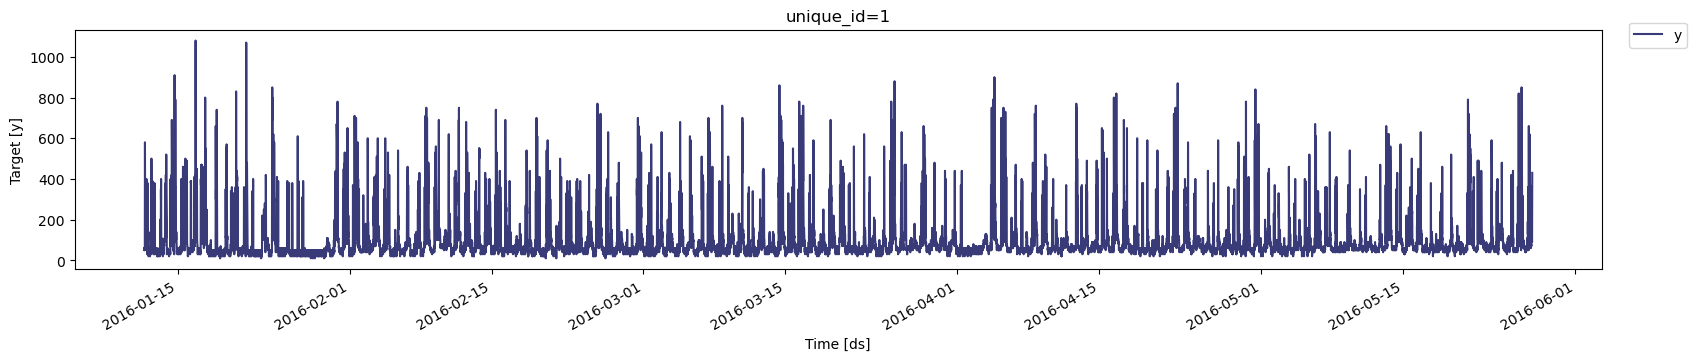

In [9]:
from statsforecast import StatsForecast

StatsForecast.plot(df=df_time)


##### Autocorrelation plots

In [10]:

# Generate ACF and PACF values with confidence intervals
acf_values, confint_acf = sm.tsa.acf(df_time["y"], nlags=432, alpha=0.05)  # 95% confidence interval
pacf_values, confint_pacf = sm.tsa.pacf(df_time["y"], nlags=432, alpha=0.05)

# Calculate lower and upper bounds for ACF and PACF
lower_acf = confint_acf[:, 0] - acf_values
upper_acf = confint_acf[:, 1] - acf_values

lower_pacf = confint_pacf[:, 0] - pacf_values
upper_pacf = confint_pacf[:, 1] - pacf_values

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Autocorrelation", "Partial Autocorrelation"))

# Plot ACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, marker_color="fuchsia", name="ACF"), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=lower_acf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=upper_acf,
    mode='lines',
    fill='tonexty',  # Fill area between the lower and upper bounds
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=1)

# Plot PACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values, marker_color="blue", name="PACF"), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=lower_pacf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=upper_pacf,
    mode='lines',
    fill='tonexty',
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=2)

# Update layout
fig.update_layout(title_text="ACF and PACF of Time Serie with Confidence Intervals", showlegend=False, height=500, width=1500)

# Show plot
fig.show()


In [22]:
diffed_series_1 = df_time["y"].diff(periods=1)

diffed_series_1.dropna(inplace=True)

# Generate ACF and PACF values with confidence intervals
acf_values, confint_acf = sm.tsa.acf(diffed_series_1, nlags=432, alpha=0.05)  # 95% confidence interval
pacf_values, confint_pacf = sm.tsa.pacf(diffed_series_1, nlags=432, alpha=0.05)

# Calculate lower and upper bounds for ACF and PACF
lower_acf = confint_acf[:, 0] - acf_values
upper_acf = confint_acf[:, 1] - acf_values

lower_pacf = confint_pacf[:, 0] - pacf_values
upper_pacf = confint_pacf[:, 1] - pacf_values

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Autocorrelation", "Partial Autocorrelation"))

# Plot ACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, marker_color="fuchsia", name="ACF"), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=lower_acf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=upper_acf,
    mode='lines',
    fill='tonexty',  # Fill area between the lower and upper bounds
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=1)

# Plot PACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values, marker_color="blue", name="PACF"), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=lower_pacf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=upper_pacf,
    mode='lines',
    fill='tonexty',
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=2)

# Update layout
fig.update_layout(title_text="ACF and PACF of Time Serie with Confidence Intervals", showlegend=False, height=500, width=1500)

# Show plot
fig.show()


In [23]:
diffed_series_2 = diffed_series_1.diff(periods=144)

diffed_series_2.dropna(inplace=True)

# Generate ACF and PACF values with confidence intervals
acf_values, confint_acf = sm.tsa.acf(diffed_series_2, nlags=432, alpha=0.05)  # 95% confidence interval
pacf_values, confint_pacf = sm.tsa.pacf(diffed_series_2, nlags=432, alpha=0.05)

# Calculate lower and upper bounds for ACF and PACF
lower_acf = confint_acf[:, 0] - acf_values
upper_acf = confint_acf[:, 1] - acf_values

lower_pacf = confint_pacf[:, 0] - pacf_values
upper_pacf = confint_pacf[:, 1] - pacf_values

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Autocorrelation", "Partial Autocorrelation"))

# Plot ACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, marker_color="fuchsia", name="ACF"), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=lower_acf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=upper_acf,
    mode='lines',
    fill='tonexty',  # Fill area between the lower and upper bounds
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=1)

# Plot PACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values, marker_color="blue", name="PACF"), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=lower_pacf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=upper_pacf,
    mode='lines',
    fill='tonexty',
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=2)

# Update layout
fig.update_layout(title_text="ACF and PACF of Time Serie with Confidence Intervals", showlegend=False, height=500, width=1500)

# Show plot
fig.show()


As we can see, we already have some information. There is differencing at lag 1 and 144 (Seasonality).

The first differencing might be related to the fact that the value of the series can change sharply and unexpectedly, even though there is no trend. The second differencing is expected since we knew there was seasonality at lag 144.

Suggested SARIMA(p, d, q)(P, D, Q) Model

**Non-seasonal:**
- \( p = 1 \), \( d = 1 \), \( q = 1 \)
  
**Seasonal:**
- \( P = 1 \), \( D = 1 \), \( Q = 1 \), \( m = 144 \)

This corresponds to the SARIMA(1, 1, 1)(1, 1, 1, 144) model. Of course, the value to (p, P) and (q, Q) might be adjusted slightly for better accuracy..  



In [45]:
from statsmodels.tsa.stattools import adfuller
# check for stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series.dropna(), maxlag = 144) # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print()
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print()
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [46]:
adf_test(df_time['y'], title='Time Series')

Augmented Dickey-Fuller Test: Time Series
ADF test statistic     -7.62e+00
p-value                 2.13e-11
# lags used             1.43e+02
# observations          1.96e+04
critical value (1%)    -3.43e+00
critical value (5%)    -2.86e+00
critical value (10%)   -2.57e+00

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The result from Augmented Dickey-Fuller Test is a contradiction of our previous statement. However, it is more common than we might imagine in Time Series analysis. 

# The triplet (E,T,S) refers to the three components: error, trend and seasonality.
# The state-space equations can be determined based on their M multiplicative, A additive, Z optimized or N ommited components. 
##### ETS(A,N,N): simple exponential smoothing with additive errors
##### ETS(M,N,N): simple exponential smoothing with multiplicative errors
##### ETS(A,A,N): Holt’s linear method with additive errors (additive errors, additive trend and no seasonality)
##### ETS(M,A,N): Holt’s linear method with multiplicative errors

In [ ]:
# For example when model=‘ANN’ (additive error, no trend, and no seasonality), ETS will explore only a simple exponential smoothing.

# ets = AutoETS(model='ANN', season_length=1)

# ets = ets.fit(y=target)